# **Rob Boswell**

# **Portfolio Project:** "Comparative Analysis of Deep Learning Models for X-ray Illness Classification"

---
---


### **Goal:**

In this portfolio project, I use a dataset containing x-rays of 3 classes - patients with COVID, patients with viral pneumonia, and patients having no illness. The goal is to compare a range of deep learning architectures to see which achieves the highest predictive strength. Though I report accuracy, a confusion matrix, precision, recall, and F1-Scores on test data for each model, I also plot the ROC Curve and calculate the area under it on test data. 

<br>

I specifically compare the metrics of 8 non-augmented models to counterpart models that vary only in that they use augmented data via Keras ImageDataGenerator and flow_from_directory; for these augmented models, though I could have used numerous image data aumentation methods, I restrict my analysis here to randomly varying levels of brightness and horizontal flips.

<br>

I run 40 epochs for each model, with EarlyStopping when validation loss has not improved after 15 epochs. I also use ModelCheckpoint for each model, saving the best version of each model which minimizes validation loss. I use ReduceLROnPlateau, but the patience and factor values vary depending on the model.

<br>

Please note that though I could have simply used OpenCV to process the x-rays using grayscale, for this project I use RGB for illustration purposes.

<br>

The 8 models I compare consist of the following architectures:

<br>

**1)**  10 convolutional layers, each with a filter size of 3x3. The first 8 layers have 32 filters, 9th layer has 16 filters, and 10th layer has 8 filters. Activations for each layer are ReLU. Batch Normalization occurs in between layers. Batch size of 60. Max Pooling with a pooling size of 2 occurs after the 2nd, 4th, 6th, and 8th layers. ReduceLROnPlateau has patience of 2 epochs and factor of 0.35. 

<br>

**2)** 10 convolutional layers, each with a filter size of 3x3. The first 8 layers have 64 filters, 9th layer has 32 filters, and 10th layer has 16 filters. Activations for each layer are ReLU. No Batch Normalization occurs. Batch size of 32. Max Pooling with a pooling size of 2 occurs after the 2nd, 4th, 6th, and 8th layers. ReduceLROnPlateau has patience of 2 epochs and factor of 0.15.

<br>

**3)** 10 convolutional layers, each with a filter size of 3x3. The first 4 layers have 32 filters, 4th through 8th layers have 64 filters, 9th layer has 32 filters, and 10th layer has 16 filters. Activations for each layer are ReLU. No Batch Normalization occurs. Batch size of 32. Max Pooling with a pooling size of 2 occurs after the 2nd, 4th, 6th, and 8th layers. ReduceLROnPlateau has patience of 2 epochs and factor of 0.05.

<br>

**4)** 9 convolutional layers, each with a filter size of 3x3. The first set of 3 layers have 32 filters, the second set of 3 layers have 64 filters, and the third set of 3 layers have 128 filters. Activations for each layer are ReLU. No Batch Normalization occurs. Batch size of 32. Max Pooling with a pooling size of 2 occurs after the 3rd, 6th, and 9th layers. ReduceLROnPlateau has patience of 2 epochs and factor of 0.05.

<br>

**5)** Modified version of SqueezeNet. It has 11 layers. The 2nd through 10th layers are fire modules with ReLU activations in which the first two layers of each fire module have a filter size of 1 and the third layer has a filter size of 3. For these 9 fire modules, the squeeze/expand layers are as follows:

1st: 8, 16

2nd: 16, 32

3rd: 26, 32

4th: 32, 64

5th: 32, 64

6th: 64, 128

7th: 64, 128

8th: 128, 256

9th: 128, 256

<br>


The first convolutional layer in the model has a filter size of 3, 32 filters, “same” padding, and a ReLU activation. The 11th convolutional layer has a filter size of 3, 64 filters, “same” padding, and a ReLU activation. Batch Normalization occurs in between the 2nd to 11th layers (including in between fire modules), and after the 11th layer. Batch size of 32. Max pooling with a pooling size of 2 occurs after the 2nd, 5th, 9th, and 10th layers, and Global Average Pooling occurs after the last convolutional layer. ReduceLROnPlateau has patience of 2 epochs and factor of 0.05.

<br>


**6)** Another modified version of SqueezeNet. It has 7 layers. The 2nd through last layers are fire modules with ReLU activation. Inside each fire module there are 6 layers. The 1st and 2nd fire module layers have a filter size of 1 and “same” padding. The 3rd and 4th layers inside each fire module have a filter size of 16 and “same” padding. The 5th and 6th layers inside each fire module have a filter size of 32 and “same” padding. For all 6 fire modules, the squeeze/expand layers are (24, 48).

<br>


**7)** A model which uses the InceptionV3 transfer learning model and ImageNet weights. All layers after the 30th layer are frozen, and the first 30 layers are fine-tuned to the x-ray images. The final InceptionV3 convolutional layer connects to a Global Average Pooling layer, which connects to two consecutive convolutional dense layers having 128 neurons each with ReLU activation, before connecting to a final dense output layer which uses softmax activation.

<br>


**8)** A model which uses the InceptionV3 transfer learning model and ImageNet weights. All layers after the 30th layer are frozen, and the first 30 layers are fine-tuned to the x-ray images. The final InceptionV3 convolutional layer connects to a Global Average Pooling layer, which connects to two consecutive convolutional dense layers having 256 neurons each with ReLU activation, before connecting to a final dense output layer which uses softmax activation.

---


### **Background:**

The dataset comprises X-ray images in three classes - the first class includes individuals who had viral pneumonia, the second includes those who do not have any infection that would be visible from X-rays, i.e. their X-rays are "normal." The third class includes those who had COVID-19 at the time of the X-ray.

<br>


The "viral pneumonia" class has 1,345 images/observations. The "normal" class has 1,341 images/observations. The "covid" class has 1,201 images/observations.

<br>


Building a predictive model using X-ray image data would be potentially very useful. First, if patients are able to receive X-ray results back before they can receive COVID-19 test results back, or if COVID-19 tests are not available (e.g., in developing countries where X-ray machines are readily available), patients would be able to know likely very quickly (perhaps even within minutes) whether there was a very high probability that they had COVID-19. This is important because even COVID-19 tests that are given as swabs through the nose are not 100% accurate.

<br>


Patients (and their loved ones and those who live with them or near them) would be benefited because those diagnosed with COVID-19 by X-ray would know to immediately quarantine. If they did so immediately, this would likely reduce the spread of COVID-19 from infected patients since those who take a regular COVID-19 test often do not receive their test results back the same day, and likely in the meantime would not quarantine.

<br>


As a result, in reality, not only would the person receiving the X-ray and their family and loved ones and those who they come in contact with
benefit from a highly accurate X-ray method of prediction, but truly society at large since there would likely not be as much spread of the virus if X-ray results could be disseminated within minutes of having them taken. 

---

### Dataset Reference:
M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, https://arxiv.org/abs/2003.13145

---

### **Model Results from the Code Run Below:**
$~$
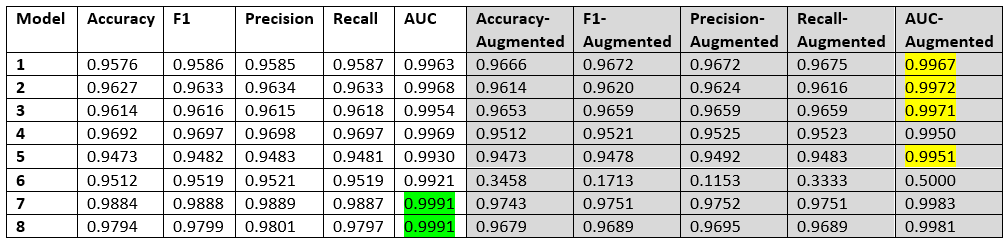

---
### **Analysis:**
<br>
Augmenting the data resulted in improved ROC AUC scores (in yellow) for 4 of the 8 models. The best performing models, which are highlighted in green (models 7 and 8, i.e., the InceptionV3 transfer learning models), performed better when not augmented. Of these two models, both had the same ROC AUC score (0.9991), but model 7 achieved better accuracy, F1, precision, and recall scores. Further, for model 6 (my second modified version of SqueezeNet), augmentation resulted in catastophic decreases in performance. However, augmenting the data for model 5 (my first modified version of SqueezeNet) resulted in improved performance.

---
### **Code:**
---


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os

In [2]:
    !gdown --id 1xt7g5LkZuX09e1a8rK9sRXIrGFN6rjzl
    !unzip COVID-19_Radiography_Database.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1xt7g5LkZuX09e1a8rK9sRXIrGFN6rjzl 

unzip:  cannot find or open COVID-19_Radiography_Database.zip, COVID-19_Radiography_Database.zip.zip or COVID-19_Radiography_Database.zip.ZIP.


In [3]:
from google.colab import drive
drive.mount('/content/my-drive/')

Mounted at /content/my-drive/


In [4]:
!pwd
import os
os.chdir('/content/my-drive/MyDrive/x-ray_project/')
!pwd

/content
/content/my-drive/MyDrive/x-ray_project


In [5]:
!pip install scikit-learn --upgrade 
import os
os.environ['TF_KERAS'] = '2.9.1'
%tensorflow_version 2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 204 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

In [7]:
# Extracting all filenames iteratively
base_path = 'images'
categories = ['Viral Pneumonia', 'NORMAL', 'COVID']

# load file names to fnames list object
fnames = []
for category in categories:
    COVID_folder = os.path.join(base_path, category)
    file_names = os.listdir(COVID_folder)
    full_path = [os.path.join(COVID_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
#print(fnames[0:2]) #examples of file names

number of images for each category: [1345, 1341, 1200]


In [8]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
# Uses opencv for image preprocessing

def preprocessor(data, shape=(192, 192)):
        """
        This function reads in images, resizes them to a fixed shape, and
        min/max transforms them, before converting feature values to float32.
        
        params:
            data
                list of unprocessed images
                      
        returns:
            X
                numpy array of preprocessed image data
                  
        """
           
        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        #I could have instead converted to grayscale images using im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (192,192)) # Change height and width of image.
        img = img / 255.0 # Min-max transform.


        # Resize the images.
        X = np.array(img)
        #X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels] if needed.
        
        X = np.array(X, dtype=np.float32)
        return X

#Try on single flower file (imports file and preprocesses it to data with following shape)

preprocessor('images/Viral Pneumonia/Viral Pneumonia (3).png').shape

(192, 192, 3)

In [9]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor, filepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
'''
import pickle
pickle.dump(X, open("X_preprocessed_x-rays.pkl", "wb"))

In [ ]:
import pickle
X = pickle.load(open("X_preprocessed_x-rays.pkl", "rb"))

In [ ]:
X.shape

(3886, 192, 192, 3)

In [10]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder 
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
pneumonia=list(repeat("Viral Pneumonia", 1345))
normal=list(repeat("NORMAL", 1341))
covid19=list(repeat("COVID", 1200))

#combine into single list of y labels
y_labels = pneumonia+normal+covid19

#check length, same as X above
print(len(y_labels)) 

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1345, 1341, 1200]
3886


COVID  NORMAL  Viral Pneumonia
0         0       0                1
1         0       0                1
2         0       0                1
3         0       0                1
4         0       0                1
...     ...     ...              ...
3881      1       0                0
3882      1       0                0
3883      1       0                0
3884      1       0                0
3885      1       0                0

[3886 rows x 3 columns]

In [ ]:
X[0].shape

(192, 192, 3)

### **Visual Inspection of Sample X-rays:** 

Below, I visualize only x-rays that either demonstrate COVID-19 postivity (first row, columns 1 and 2), or no illness at all (second row, columns 1 and 2). It is clear that chest x-rays of individuals with COVID-19 tend to have much more inflamation than chest x-rays of individuals who have no illness.

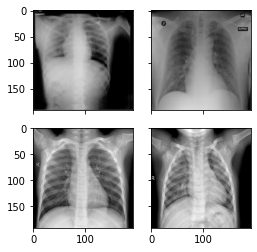

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor('images/COVID/COVID (235).png')
im2 =preprocessor('images/COVID/COVID (199).png')
im3 =preprocessor('images/NORMAL/NORMAL (1005).png')
im4 =preprocessor('images/NORMAL/NORMAL (1073).png')

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [12]:
# Train test split resized images
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

y_train

COVID  NORMAL  Viral Pneumonia
1702      0       1                0
2394      0       1                0
364       0       0                1
1208      0       0                1
939       0       0                1
...     ...     ...              ...
1372      0       1                0
3755      1       0                0
543       0       0                1
2447      0       1                0
3279      1       0                0

[3108 rows x 3 columns]

In [ ]:
X_train.shape

(3108, 192, 192, 3)

### **Note:** 

Since I am using a validation split of 0.20, a common level, the validation set = 20% of the size of the training set. Since the original training set created from train_test_split comprises 80% of the size of the overall dataset, and since creating the validation set takes away 20% of the original training set, this means that the validation set = 0.20*0.80 = 16% of the size of the overall dataset. Therefore, the training set now = 80% - 16% = 64% of the size of the overall dataset. Thus, the train/validation/test set ratio becomes: 64%/16%/20%.

---
## Model 1
---

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.metrics import AUC


with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  opt=Adam(learning_rate=.001)

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=8, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.35) #factor = the factor by which the lr is reduced when val_accuracy fails to improve after the number of epochs set to equal "patience"
  mc = ModelCheckpoint('best_model_1_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, epochs = 40, verbose=1, validation_split=0.20, batch_size=60, callbacks=[mc,red_lr,es])

    

Epoch 1/40
42/42 [==============================] - ETA: 0s - loss: 0.4063 - accuracy: 0.8512 - auc: 0.9572
Epoch 00001: val_loss improved from inf to 1.12842, saving model to best_model_1_non-aug.h5
42/42 [==============================] - 22s 252ms/step - loss: 0.4063 - accuracy: 0.8512 - auc: 0.9572 - val_loss: 1.1284 - val_accuracy: 0.3633 - val_auc: 0.5189 - lr: 0.0010
Epoch 2/40
42/42 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9549 - auc: 0.9944
Epoch 00002: val_loss did not improve from 1.12842
42/42 [==============================] - 7s 167ms/step - loss: 0.1382 - accuracy: 0.9549 - auc: 0.9944 - val_loss: 1.1935 - val_accuracy: 0.3633 - val_auc: 0.5945 - lr: 0.0010
Epoch 3/40
42/42 [==============================] - ETA: 0s - loss: 0.0812 - accuracy: 0.9722 - auc: 0.9982
Epoch 00003: val_loss did not improve from 1.12842

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.
42/42 [==============================] - 7s 168

In [13]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_1_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [14]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x): # adjusted from keras github code
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))

# Now we can extract some evaluative metrics

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred, classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata     

25/25 [==============================] - 9s 28ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 2 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 2 1 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 1 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 2 2 2 1
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 2 0 2 1 2 2 0 1 1 2 2 2 1 1 2 0 2 1
 2 2 1 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 2 0 0 2 0 2 1 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 2 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 2 2 1 2 0 2 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 1 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 1 0 0 0 2 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 2 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2

In [15]:
# y_test is one hot encoded so we need to extract labels before running model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels


In [16]:
# get metrics
model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.957584  0.958572   0.958499  0.958659

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 22ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


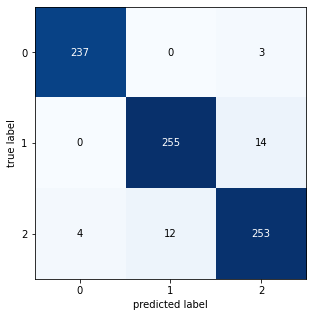

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9834    0.9875    0.9854       240
         NORMAL     0.9551    0.9480    0.9515       269
Viral Pneumonia     0.9370    0.9405    0.9388       269

       accuracy                         0.9576       778
      macro avg     0.9585    0.9587    0.9586       778
   weighted avg     0.9576    0.9576    0.9576       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


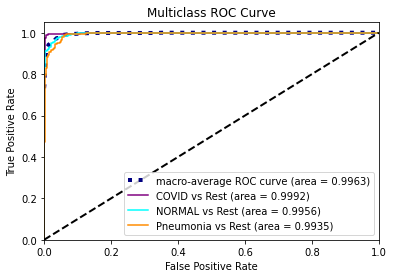

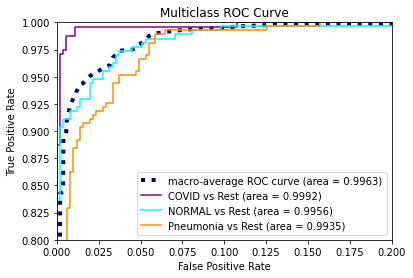

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoomed in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [17]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 5.2521873e-06, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


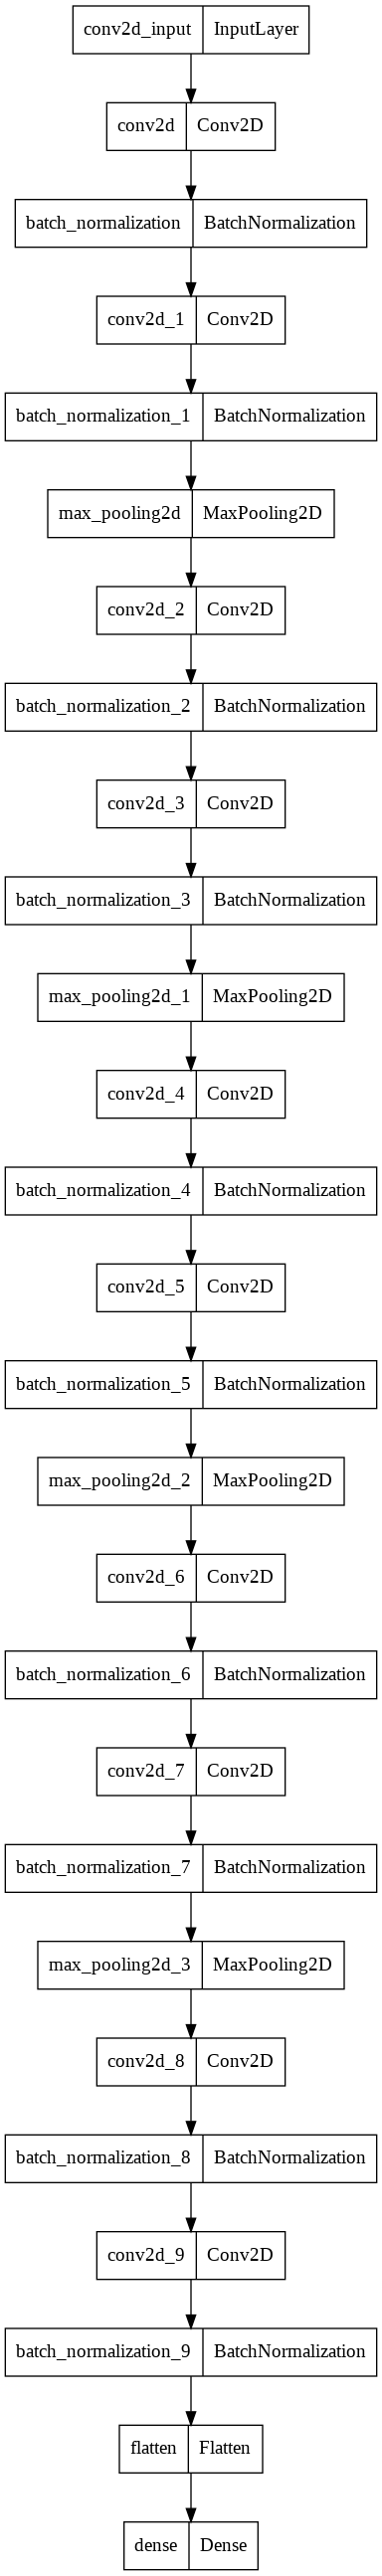

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_1.png')

---
# Model 2
---

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from keras.metrics import AUC
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
   
  es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.15)
  mc = ModelCheckpoint('best_model_2_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  

  model.fit(X_train, y_train, 
                    epochs = 40, verbose=1,validation_split=0.20, callbacks=[red_lr, mc, es])

Epoch 1/40
78/78 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.6999 - auc: 0.8818
Epoch 00001: val_loss improved from inf to 0.35924, saving model to best_model_2_non-aug.h5
78/78 [==============================] - 19s 200ms/step - loss: 0.6719 - accuracy: 0.6999 - auc: 0.8818 - val_loss: 0.3592 - val_accuracy: 0.8826 - val_auc: 0.9736 - lr: 0.0010
Epoch 2/40
78/78 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.8858 - auc: 0.9737
Epoch 00002: val_loss improved from 0.35924 to 0.23153, saving model to best_model_2_non-aug.h5
78/78 [==============================] - 12s 160ms/step - loss: 0.3055 - accuracy: 0.8858 - auc: 0.9737 - val_loss: 0.2315 - val_accuracy: 0.9180 - val_auc: 0.9856 - lr: 0.0010
Epoch 3/40
78/78 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.9167 - auc: 0.9821
Epoch 00003: val_loss improved from 0.23153 to 0.18890, saving model to best_model_2_non-aug.h5
78/78 [==============================]

In [18]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_2_non-aug.h5")

In [19]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [20]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 3s 61ms/step
[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 1 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 0 2 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 1 2 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 0 0 2 2 0 2 1 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 2 0 1 2 0 0 0 2 2 2 0 1 2 2 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 1 1 1 0 0 1 2 2 1 0 2 0 1 2 2 0 2 0
 1 2 0 0 0 2 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 2 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 2 2 2

In [ ]:
y_test_labels=y_test.idxmax(axis=1)

y_test_labels=list(y_test.idxmax(axis=1))

In [ ]:
model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.962725  0.963333    0.96342  0.963316

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 51ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


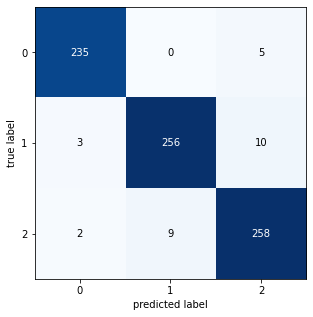

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9792    0.9792    0.9792       240
         NORMAL     0.9660    0.9517    0.9588       269
Viral Pneumonia     0.9451    0.9591    0.9520       269

       accuracy                         0.9627       778
      macro avg     0.9634    0.9633    0.9633       778
   weighted avg     0.9628    0.9627    0.9627       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


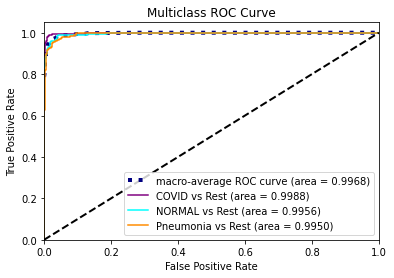

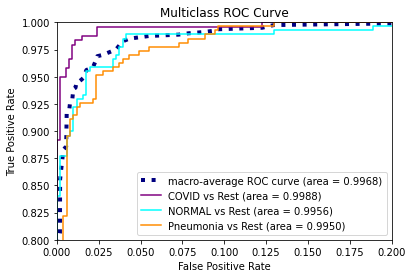

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [21]:
import tensorflow.keras.backend as K

#print(model.get_config())
print(K.eval(model.optimizer.get_config()))
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 0.00015, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


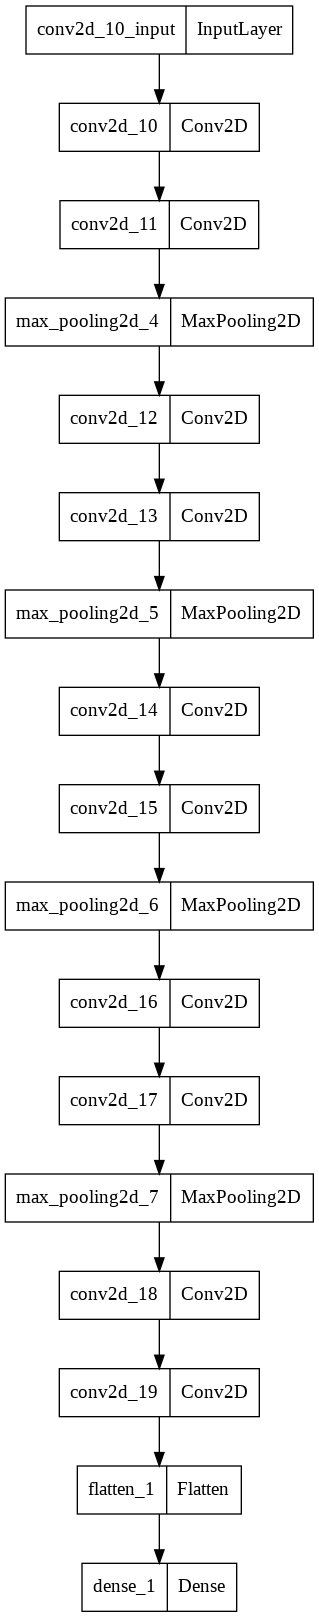

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_2.png')

---
# Model 3
---

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  
  es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05) 
  mc = ModelCheckpoint('best_model_3_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, 
                    epochs = 40, verbose=1,validation_split=0.20, callbacks=[red_lr, mc, es])

Epoch 1/40
78/78 [==============================] - ETA: 0s - loss: 0.6032 - accuracy: 0.7329 - auc: 0.9015
Epoch 00001: val_loss improved from inf to 0.25016, saving model to best_model_3_non-aug.h5
78/78 [==============================] - 18s 115ms/step - loss: 0.6032 - accuracy: 0.7329 - auc: 0.9015 - val_loss: 0.2502 - val_accuracy: 0.9003 - val_auc: 0.9818 - lr: 0.0010
Epoch 2/40
78/78 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.9143 - auc: 0.9797
Epoch 00002: val_loss improved from 0.25016 to 0.22517, saving model to best_model_3_non-aug.h5
78/78 [==============================] - 6s 80ms/step - loss: 0.2604 - accuracy: 0.9143 - auc: 0.9797 - val_loss: 0.2252 - val_accuracy: 0.9228 - val_auc: 0.9858 - lr: 0.0010
Epoch 3/40
78/78 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9288 - auc: 0.9885
Epoch 00003: val_loss improved from 0.22517 to 0.17243, saving model to best_model_3_non-aug.h5
78/78 [==============================] -

In [22]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_3_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [24]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x): # adjusted from keras github code
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

# Now we can extract some evaluative metrics to use for model submission

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 1s 28ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 2 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 0 2 1 1 1 1 2 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 1 0 2 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 0 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 0 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 2 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 0 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 1 1 2 0 0 0 2 2 2 0 1 2 2 0 2 0 1 2 1 2 1 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 0 1 1 2 0 1 2 1 1 0 0 0 1 2 2 1 2 0
 1 1 0 2 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 2 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 2 2 1 1 1 0 0 0 1 2 2

In [ ]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels

In [ ]:
# get metrics
model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
   0.96144  0.961623   0.961484  0.961777

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 27ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


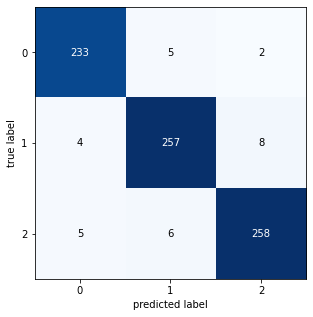

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9628    0.9708    0.9668       240
         NORMAL     0.9590    0.9554    0.9572       269
Viral Pneumonia     0.9627    0.9591    0.9609       269

       accuracy                         0.9614       778
      macro avg     0.9615    0.9618    0.9616       778
   weighted avg     0.9614    0.9614    0.9614       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


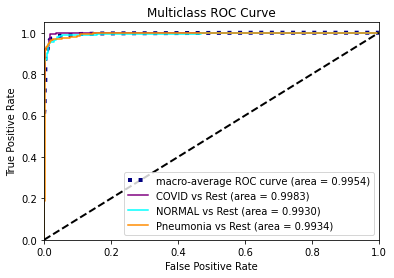

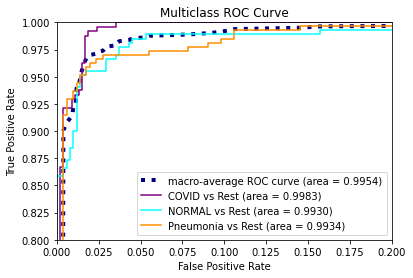

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [25]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 5.0000002e-05, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


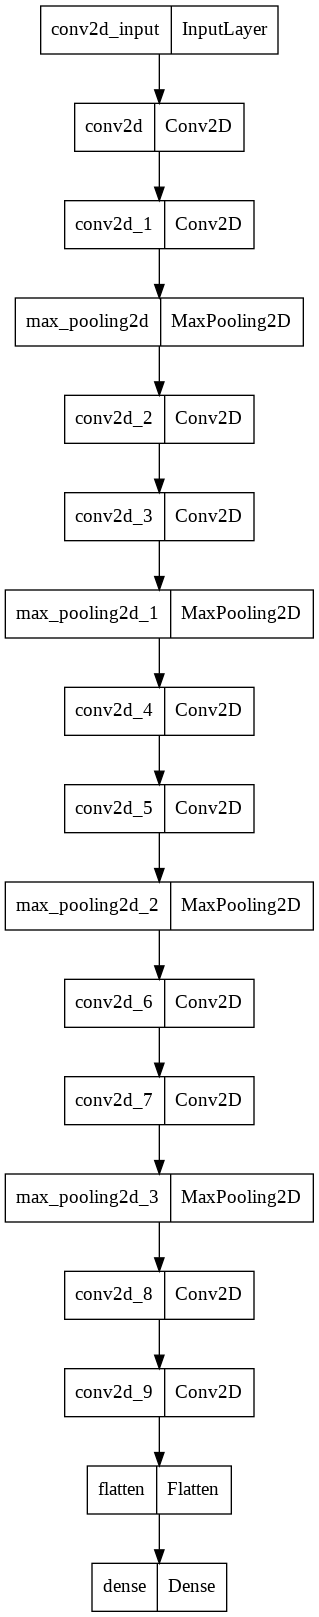

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_3.png')

---
# Model 4
---

In [ ]:
#Left off:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),    
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),    
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])


  es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05)
  mc = ModelCheckpoint('best_model_4_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
    
  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, 
                    epochs = 40, verbose=1,validation_split=0.20, callbacks=[red_lr, mc, es])
                  

Epoch 1/15
78/78 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.7144
Epoch 1: val_accuracy improved from -inf to 0.88103, saving model to best_model_4.h5
78/78 [==============================] - 16s 186ms/step - loss: 0.6015 - accuracy: 0.7144 - val_loss: 0.3030 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 2/15
78/78 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9212
Epoch 2: val_accuracy improved from 0.88103 to 0.95338, saving model to best_model_4.h5
78/78 [==============================] - 12s 159ms/step - loss: 0.2188 - accuracy: 0.9212 - val_loss: 0.1373 - val_accuracy: 0.9534 - lr: 0.0010
Epoch 3/15
78/78 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9481
Epoch 3: val_accuracy did not improve from 0.95338
78/78 [==============================] - 12s 154ms/step - loss: 0.1530 - accuracy: 0.9481 - val_loss: 0.1920 - val_accuracy: 0.9309 - lr: 0.0010
Epoch 4/15
78/78 [==============================] - ETA: 0s

In [26]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_4_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [27]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns


predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)


import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 2s 51ms/step
[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 0 1 1 0 1 0 0 0 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 2 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 1 1 1 2 0 2 1
 2 2 2 1 2 1 0 1 0 0 2 0 2 0 2 1 2 0 1 1 2 2 1 0 1 2 1 2 1 0 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 1 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 2 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 1 1 1 2 0 1 2 2 1 0 0 0 1 2 2 0 2 0
 1 1 0 0 0 2 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 2 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2

In [ ]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels


In [ ]:
# get metrics
model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.969152  0.969748   0.969848  0.969661

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 52ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


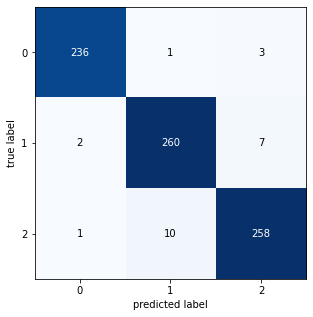

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9874    0.9833    0.9854       240
         NORMAL     0.9594    0.9665    0.9630       269
Viral Pneumonia     0.9627    0.9591    0.9609       269

       accuracy                         0.9692       778
      macro avg     0.9698    0.9697    0.9697       778
   weighted avg     0.9692    0.9692    0.9692       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


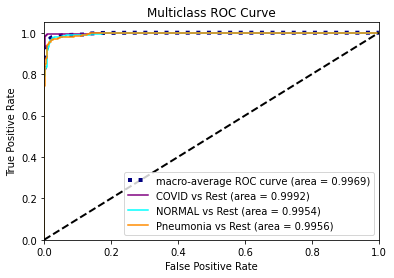

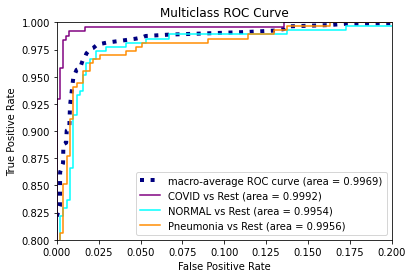

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [28]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 1.2500001e-07, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


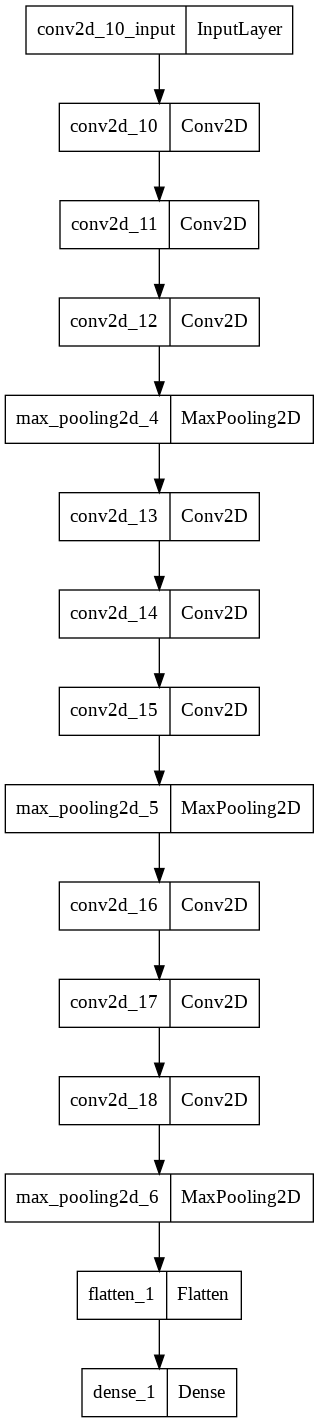

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_4.png')

---
# Model 5
---

### **Version of SqueezeNet** 

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Let's build a squeezenet model instead to see how well it performs 
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC
l = tf.keras.layers # syntax shortcut

# Create function to define fire modules
def fire(x, squeeze, expand):
  y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y3 = l.Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)

with tf.device('/device:GPU:0'):
            x = tf.keras.layers.Input(shape=[192,192, 3]) # input is 192x192 pixels RGB

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = fire_module(8, 16)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(16, 32)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(26, 32)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(32, 64)(y)
            y = tf.keras.layers.BatchNormalization()(y)                         
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(32, 64)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(64, 128)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(64, 128)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(128, 256)(y)
            y = tf.keras.layers.BatchNormalization()(y)                        
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(128, 256)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(y)
            y = tf.keras.layers.BatchNormalization()(y)                       
            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(3, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model = tf.keras.Model(x, y)

            es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
            red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05)
            mc = ModelCheckpoint('best_model_5_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
            
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'AUC']) 
        
            model.fit(X_train, y_train, 
                    epochs = 40, verbose=1,validation_split=0.20,batch_size=32,callbacks=[red_lr, mc, es])

Epoch 1/25
78/78 [==============================] - ETA: 0s - loss: 0.4285 - acc: 0.8395
Epoch 1: val_acc improved from -inf to 0.31350, saving model to best_model_5.h5
78/78 [==============================] - 26s 192ms/step - loss: 0.4285 - acc: 0.8395 - val_loss: 3.6241 - val_acc: 0.3135 - lr: 0.0010
Epoch 2/25
78/78 [==============================] - ETA: 0s - loss: 0.2481 - acc: 0.9179
Epoch 2: val_acc improved from 0.31350 to 0.36334, saving model to best_model_5.h5
78/78 [==============================] - 12s 154ms/step - loss: 0.2481 - acc: 0.9179 - val_loss: 4.1546 - val_acc: 0.3633 - lr: 0.0010
Epoch 3/25
78/78 [==============================] - ETA: 0s - loss: 0.1941 - acc: 0.9324
Epoch 3: val_acc did not improve from 0.36334
78/78 [==============================] - 11s 147ms/step - loss: 0.1941 - acc: 0.9324 - val_loss: 4.1904 - val_acc: 0.3633 - lr: 0.0010
Epoch 4/25
78/78 [==============================] - ETA: 0s - loss: 0.1591 - acc: 0.9477
Epoch 00004: ReduceLROnPlateau

In [29]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_5_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [30]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 3s 56ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 1 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 0 2 1
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 2 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 1 0 0 0 2 1 1 0 1 0 0 0 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 1 1 0 1 1 2 2 0 1 1 2 2 1 1 1 2 2 2 1
 2 2 1 1 2 1 0 2 2 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 0 0 2 2 0 2 1 2
 2 2 1 0 2 1 2 1 2 1 1 1 1 0 0 1 2 0 0 0 1 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 2 0 2 0 2 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 1 1 1 0 0 1 2 1 1 0 0 0 1 2 2 2 2 0
 1 1 0 0 0 2 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 2 1 0 2 0 1 0 1 0 0
 1 0 0 1 2 2 0 2 1 0 0 2 1 2 1 1 1 0 2 0 1 2 2

In [ ]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels


In [ ]:
# get metrics
model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.947301  0.948233   0.948334  0.948146

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 43ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


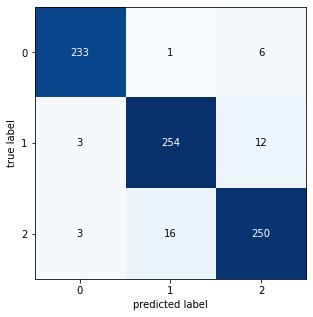

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9749    0.9708    0.9729       240
         NORMAL     0.9373    0.9442    0.9407       269
Viral Pneumonia     0.9328    0.9294    0.9311       269

       accuracy                         0.9473       778
      macro avg     0.9483    0.9481    0.9482       778
   weighted avg     0.9473    0.9473    0.9473       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


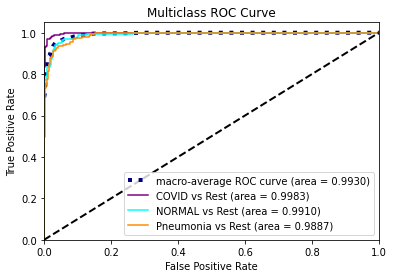

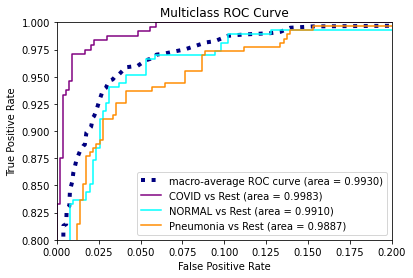

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [31]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 2.5000002e-06, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


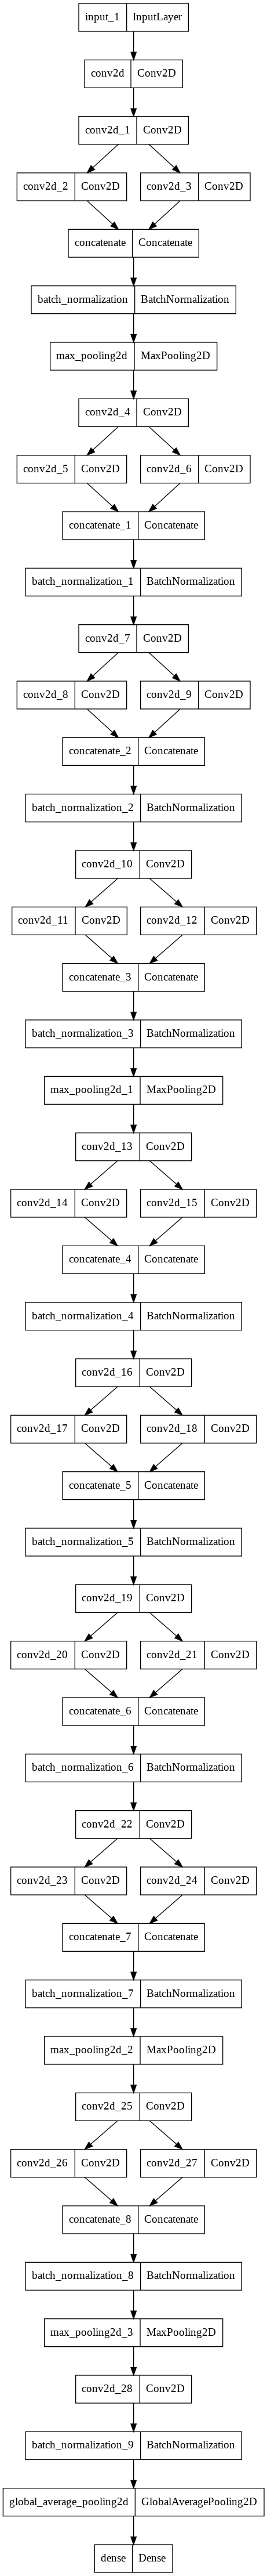

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_5.png')

---
# Model 6
---

### **Another Version of SqueezeNet:**

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.metrics import AUC
l = tf.keras.layers

# Create function to define fire modules
def fire(x, squeeze, expand):
  y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y2 = l.Conv2D(filters=expand//2, kernel_size=16, padding='same', activation='relu')(y)
  y3 = l.Conv2D(filters=expand//2, kernel_size=16, padding='same', activation='relu')(y)
  y4 = l.Conv2D(filters=expand//2, kernel_size=32, padding='same', activation='relu')(y)
  y5 = l.Conv2D(filters=expand//2, kernel_size=32, padding='same', activation='relu')(y)

  return tf.keras.layers.concatenate([y1, y2, y3, y3, y4, y5])

def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)

with tf.device('/device:GPU:0'):
            x = tf.keras.layers.Input(shape=[192,192, 3]) # input is 192x192 pixels RGB

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)                        
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)                                                                       
            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(3, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model = tf.keras.Model(x, y)

            es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
            red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.20)
            mc = ModelCheckpoint('best_model_6_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
            
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])
        
            model.fit(X_train, y_train, 
                    epochs = 40, verbose=1,validation_split=0.20,batch_size=50,callbacks=[red_lr, mc, es])

Epoch 1/25
50/50 [==============================] - ETA: 0s - loss: 107.6702 - acc: 0.3399
Epoch 1: val_acc improved from -inf to 0.32315, saving model to best_model_6.h5
50/50 [==============================] - 275s 4s/step - loss: 107.6702 - acc: 0.3399 - val_loss: 1.0999 - val_acc: 0.3232 - lr: 0.0010
Epoch 2/25
50/50 [==============================] - ETA: 0s - loss: 1.0984 - acc: 0.3504
Epoch 2: val_acc did not improve from 0.32315
50/50 [==============================] - 93s 2s/step - loss: 1.0984 - acc: 0.3504 - val_loss: 1.0987 - val_acc: 0.3232 - lr: 0.0010
Epoch 3/25
50/50 [==============================] - ETA: 0s - loss: 1.0979 - acc: 0.3250
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_acc did not improve from 0.32315
50/50 [==============================] - 93s 2s/step - loss: 1.0979 - acc: 0.3250 - val_loss: 1.0979 - val_acc: 0.3232 - lr: 0.0010
Epoch 4/25
50/50 [==============================] - ETA: 0s - loss: 1.0974 - a

In [32]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_6_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [33]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 38s 637ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 1 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 1 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 2 2 1 1 1 2 0 0 2 2 1 2 2 2
 0 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 2 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 2 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 1 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 2 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 2 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 2 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 1 1 2 0 0 0 2 2 2 0 1 2 2 0 2 0 2 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 1 0 0 0 2 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 2 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 0

In [ ]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels


In [ ]:
model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.951157  0.951907   0.952058  0.951864

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 7s 270ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


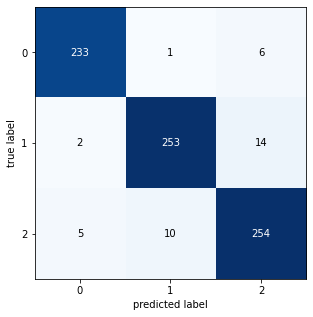

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9708    0.9708    0.9708       240
         NORMAL     0.9583    0.9405    0.9493       269
Viral Pneumonia     0.9270    0.9442    0.9355       269

       accuracy                         0.9512       778
      macro avg     0.9521    0.9519    0.9519       778
   weighted avg     0.9514    0.9512    0.9512       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


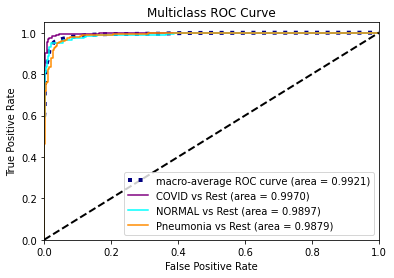

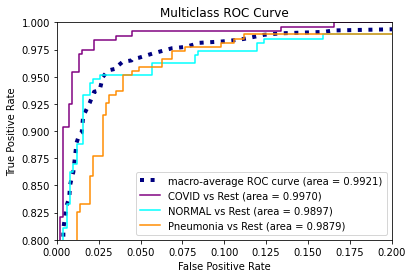

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [34]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 2.5600002e-09, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


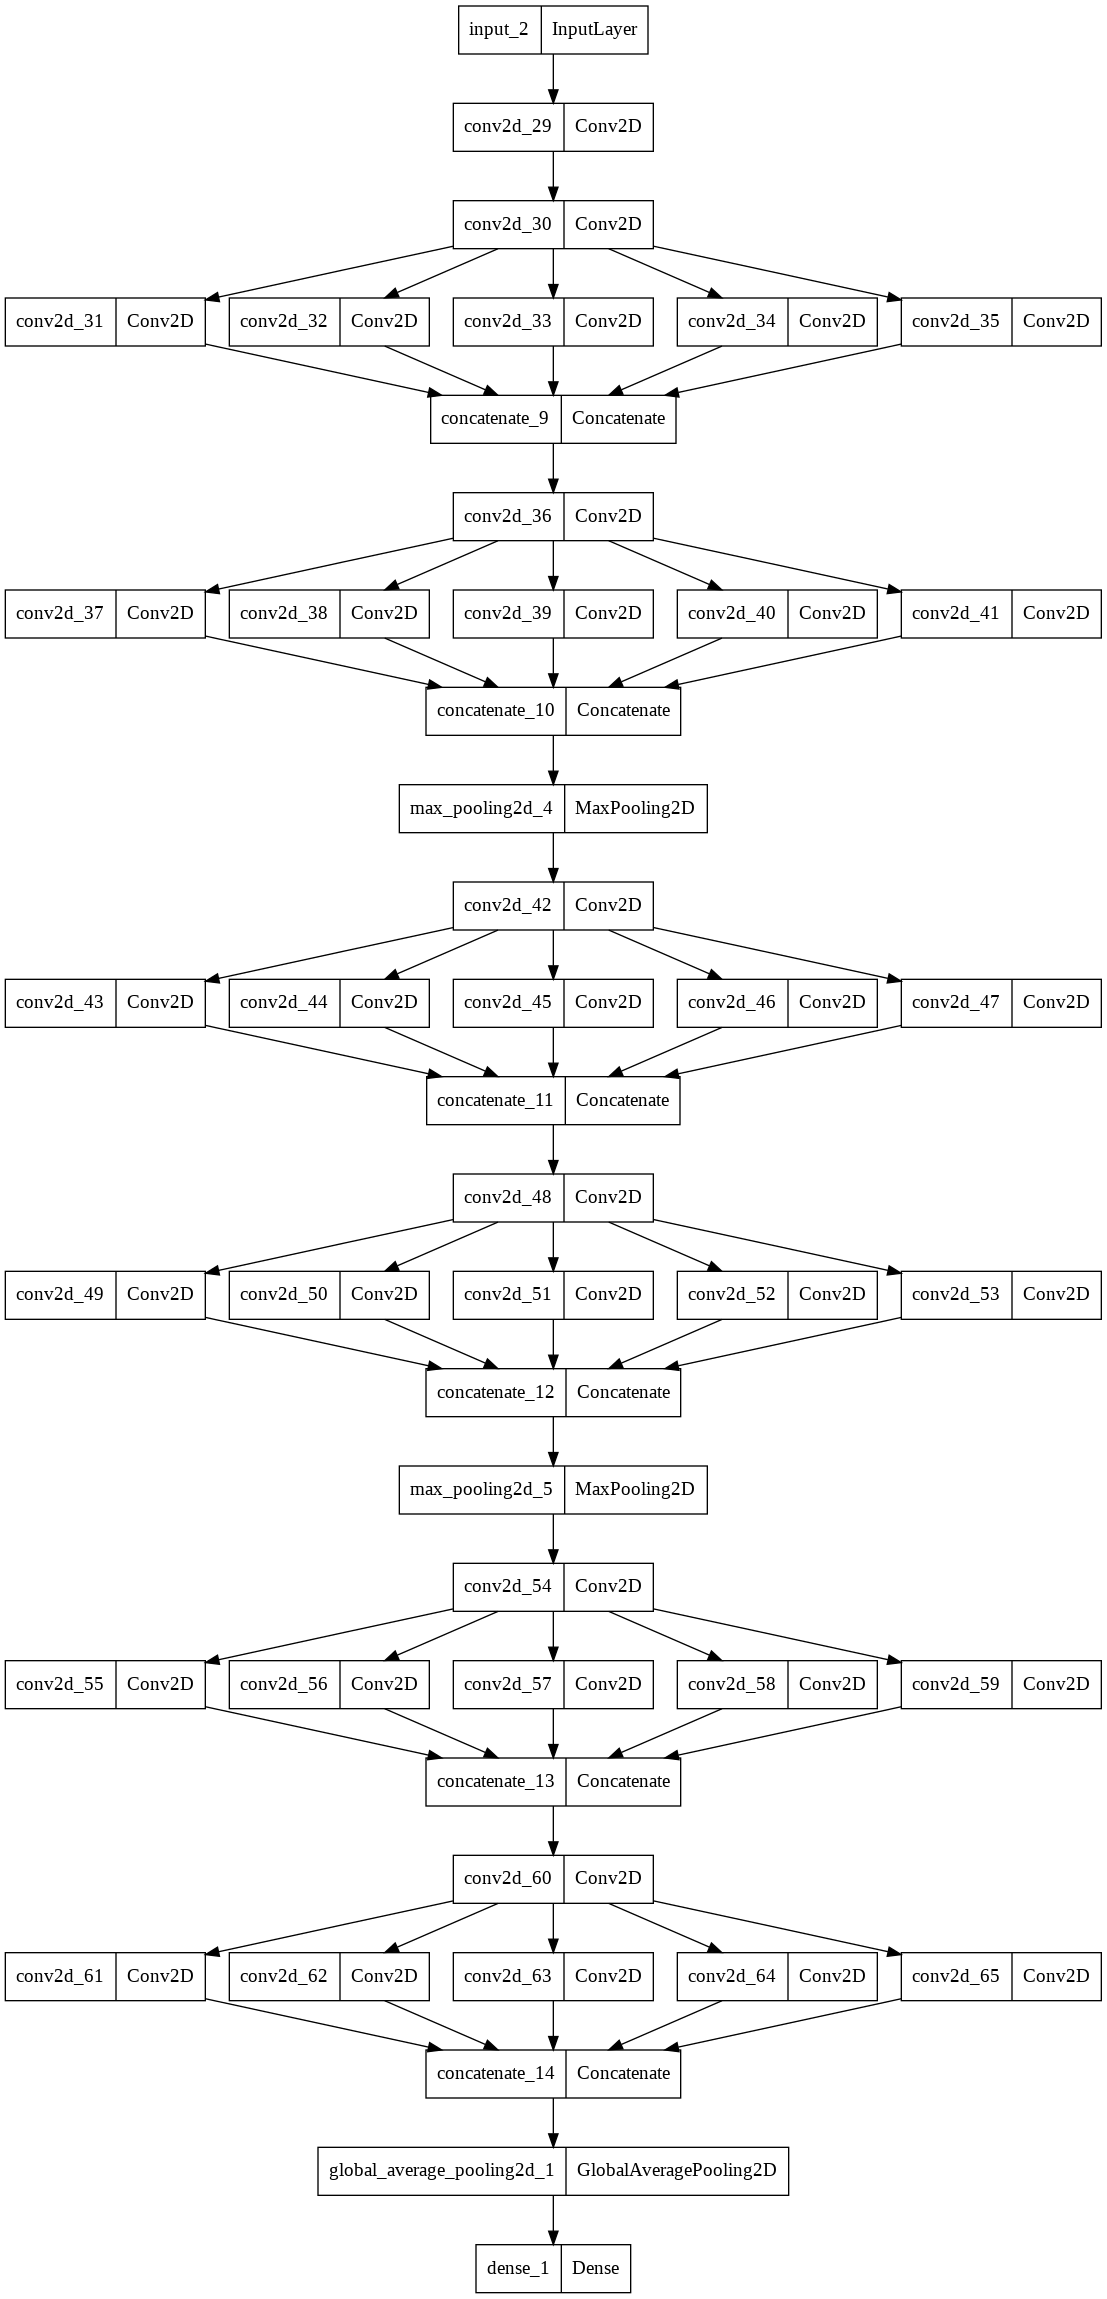

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_6.png')

---
# Model 7
---

### **InceptionV3 Transfer Learning Model**

---




In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping



# load model new input layer shape.

IMG_SHAPE = (192, 192, 3)

# Create the base model from the pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.summary() # Notice unfrozen number of trainable parameters

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 95, 95, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [ ]:
len(base_model.trainable_variables)

188

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune everything up to this layer onwards
freeze_layers_after=30

# Freeze all the layers after the `freeze_layers_after` layer
for layer in base_model.layers[freeze_layers_after:]: # Using [integer:] indexes every value after the interger in the list
  layer.trainable =  False

print("Number of layers frozen in the base model: ", len(base_model.layers)-freeze_layers_after)


Number of layers in the base model:  311
Number of layers frozen in the base model:  281


In [ ]:
len(base_model.trainable_variables) #trainable layers after freezing

18

In [ ]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
gap1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
class1 = Dense(128, activation='relu')(gap1)
class1 = Dense(128, activation='relu')(class1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
# summarize
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 95, 95, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  mc = ModelCheckpoint('best_model_7_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=4,verbose=1,factor=0.05)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'AUC']) 

  model.fit(X_train, y_train, batch_size=32,
          epochs = 40, verbose=1, validation_split=0.20, callbacks=[mc,red_lr,es])  

Epoch 1/40
78/78 [==============================] - ETA: 0s - loss: 0.3650 - acc: 0.8644
Epoch 1: val_acc improved from -inf to 0.84727, saving model to best_model_7.h5
78/78 [==============================] - 25s 218ms/step - loss: 0.3650 - acc: 0.8644 - val_loss: 0.4128 - val_acc: 0.8473 - lr: 0.0010
Epoch 2/40
78/78 [==============================] - ETA: 0s - loss: 0.1495 - acc: 0.9461
Epoch 2: val_acc did not improve from 0.84727
78/78 [==============================] - 12s 151ms/step - loss: 0.1495 - acc: 0.9461 - val_loss: 1.4051 - val_acc: 0.6704 - lr: 0.0010
Epoch 3/40
78/78 [==============================] - ETA: 0s - loss: 0.1331 - acc: 0.9545
Epoch 3: val_acc improved from 0.84727 to 0.88424, saving model to best_model_7.h5
78/78 [==============================] - 14s 177ms/step - loss: 0.1331 - acc: 0.9545 - val_loss: 0.3508 - val_acc: 0.8842 - lr: 0.0010
Epoch 4/40
78/78 [==============================] - ETA: 0s - loss: 0.0876 - acc: 0.9710
Epoch 4: val_acc did not impro

In [35]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_7_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [36]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 4s 80ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 1 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 1 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 1 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2

In [ ]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

y_test_labels=list(y_test.idxmax(axis=1)) #returns a pandas series of predicted labels


In [ ]:
model_eval_metrics(y_test_labels, predicted_labels, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.988432  0.988779   0.988875  0.988698

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 56ms/step


In [ ]:
labels=list(y_train.columns)
print(labels)

['COVID', 'NORMAL', 'Viral Pneumonia']


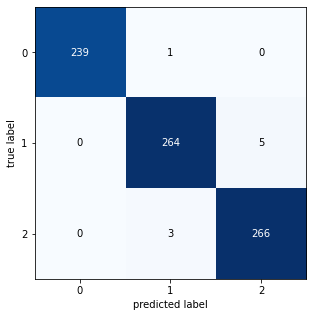

Classification Report
                 precision    recall  f1-score   support

          COVID     1.0000    0.9958    0.9979       240
         NORMAL     0.9851    0.9814    0.9832       269
Viral Pneumonia     0.9815    0.9888    0.9852       269

       accuracy                         0.9884       778
      macro avg     0.9889    0.9887    0.9888       778
   weighted avg     0.9885    0.9884    0.9884       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


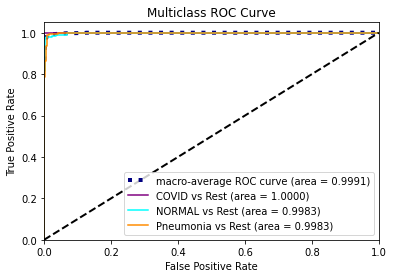

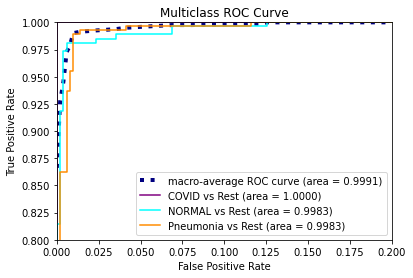

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [37]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 2.5000002e-06, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


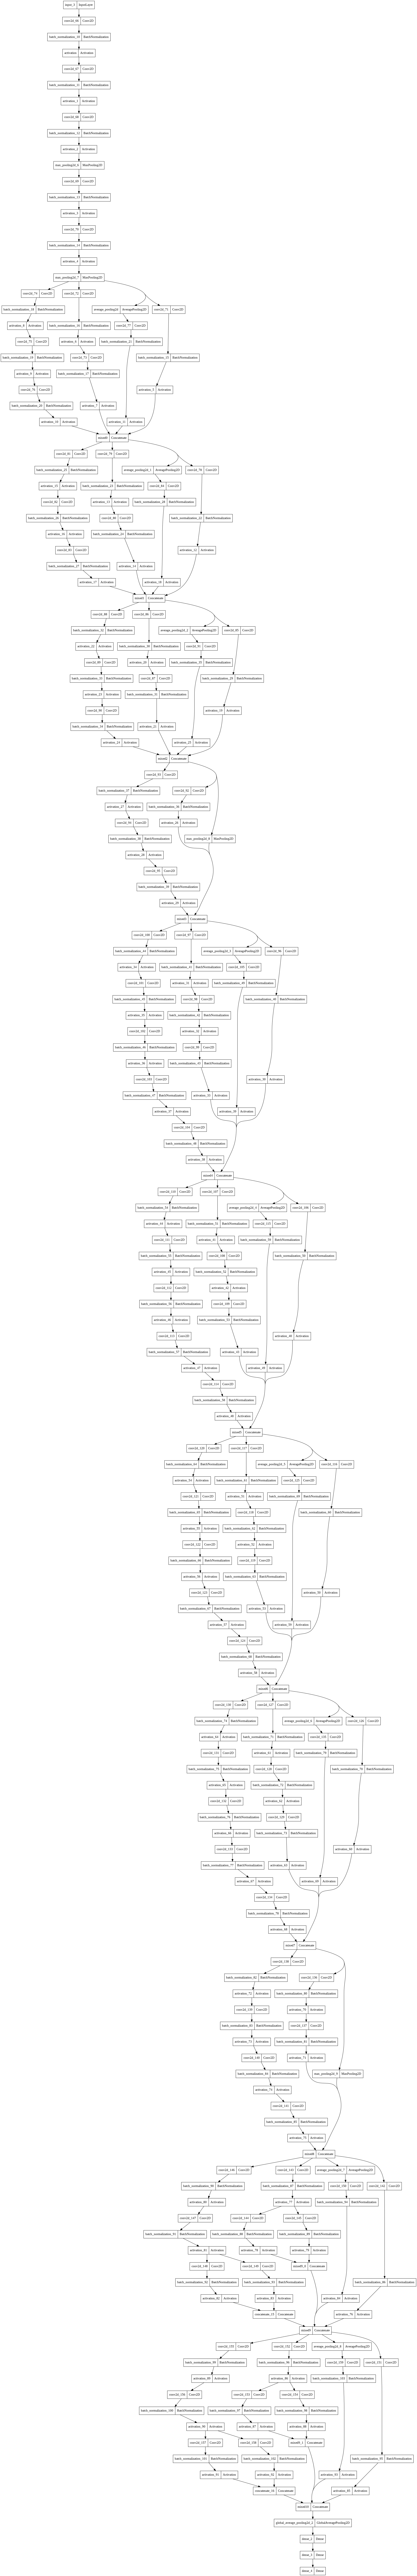

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_7.png')

---
# Model 8
---

**Revised Version of the Above InceptionV3 Transfer Learning Model:**

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
gap1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
class1 = Dense(256, activation='relu')(gap1)
class1 = Dense(256, activation='relu')(class1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 95, 95, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  mc = ModelCheckpoint('best_model_8_non-aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
  red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.20)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'AUC']) 

  model.fit(X_train, y_train, batch_size=32,
          epochs = 20, verbose=1, validation_data=(X_test,y_test), callbacks=[mc, red_lr, es])  

Epoch 1/20
98/98 [==============================] - ETA: 0s - loss: 0.1547 - acc: 0.9588
Epoch 1: val_acc improved from -inf to 0.93059, saving model to best_model_8.h5
98/98 [==============================] - 24s 189ms/step - loss: 0.1547 - acc: 0.9588 - val_loss: 0.2557 - val_acc: 0.9306 - lr: 0.0010
Epoch 2/20
97/98 [============================>.] - ETA: 0s - loss: 0.0362 - acc: 0.9890
Epoch 2: val_acc improved from 0.93059 to 0.94602, saving model to best_model_8.h5
98/98 [==============================] - 17s 170ms/step - loss: 0.0362 - acc: 0.9891 - val_loss: 0.1726 - val_acc: 0.9460 - lr: 0.0010
Epoch 3/20
97/98 [============================>.] - ETA: 0s - loss: 0.0418 - acc: 0.9874
Epoch 3: val_acc did not improve from 0.94602
98/98 [==============================] - 15s 154ms/step - loss: 0.0418 - acc: 0.9875 - val_loss: 0.3415 - val_acc: 0.9152 - lr: 0.0010
Epoch 4/20
97/98 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9826
Epoch 4: val_acc did not impro

In [38]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_8_non-aug.h5")

In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [ ]:
y_true_test = np.argmax(y_test_array,axis=1)
print(y_true_test)
print(y_true_test.shape)
print(y_true_test.dtype)

[2 0 1 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 1 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 2 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 0 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 2 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 0 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 1 0 2 2 0 2 2 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 0 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 0 2 1
 1 1 1 2 0 0 2 2 0 1 1 1 

In [39]:
import tensorflow.keras.backend as K

#print(model.get_config()) # Full configuration to fit keras model
print(K.eval(model.optimizer.get_config())) # Optimizer configuration
#print(len(model.history.epoch)) # Number of epochs

{'name': 'Adam', 'learning_rate': 0.00020000001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


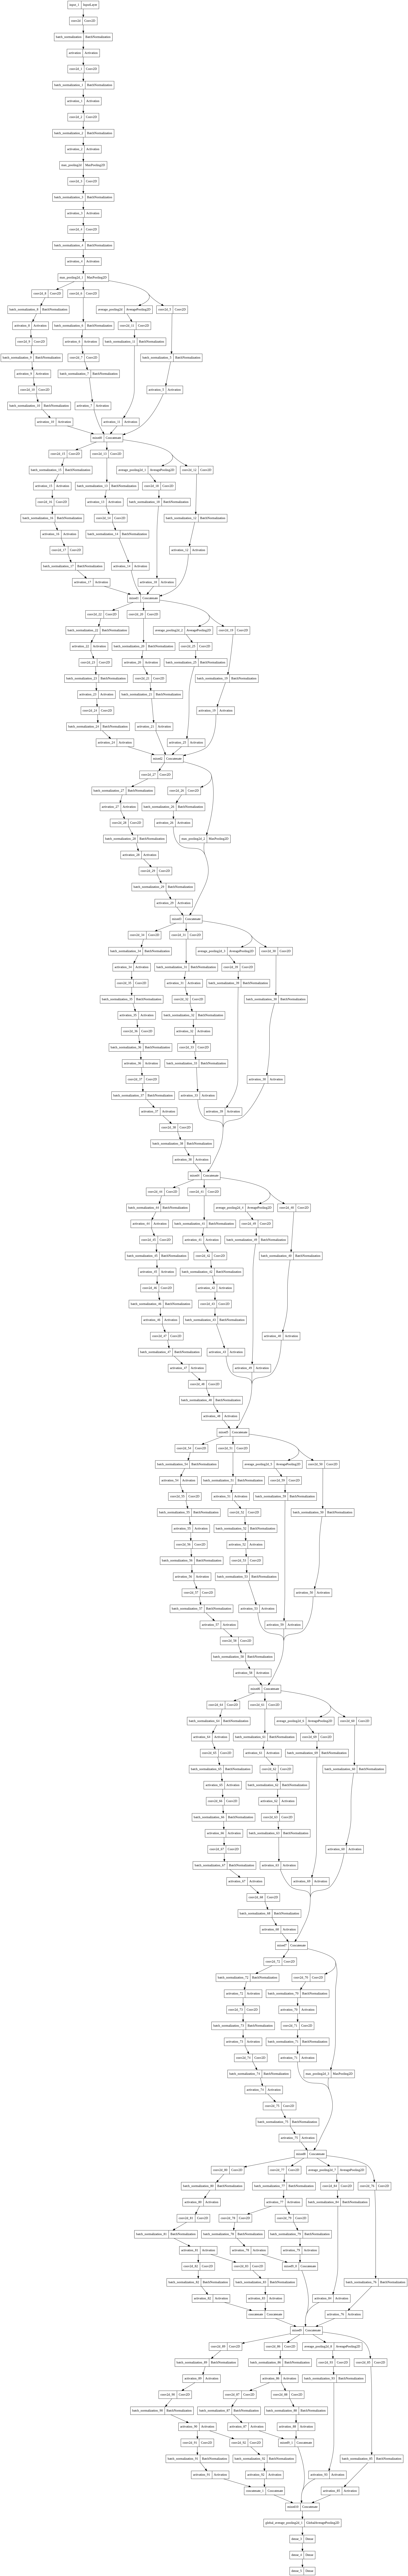

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_8.png')

In [40]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model.predict(X_test)))

prediction_index=predict_classes(model.predict(X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))
#print(predicted_labels)

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

25/25 [==============================] - 2s 53ms/step
[2 0 2 1 2 1 0 1 2 0 1 1 2 1 1 0 0 1 0 1 1 1 1 0 1 2 2 1 2 0 2 1 0 2 1 1 0
 2 1 2 0 2 1 2 0 1 2 2 0 0 2 0 2 0 2 2 1 2 1 0 0 2 0 1 0 0 1 2 2 2 0 2 2 1
 0 0 2 1 0 1 1 2 0 0 1 0 1 2 1 1 0 1 2 1 1 1 1 2 1 1 1 1 2 0 0 2 2 1 2 2 2
 1 1 1 2 2 2 0 1 0 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 1 0 1 1 0 1 0 0 1 1 2 2
 0 0 0 0 1 0 0 2 0 0 1 1 2 0 2 1 0 2 1 1 1 1 2 0 1 1 1 2 2 0 1 0 2 2 2 2 0
 2 1 0 1 1 0 2 0 0 0 0 1 1 0 1 0 0 2 1 2 1 1 2 0 0 2 2 2 2 0 0 0 2 0 1 2 2
 0 2 1 1 2 0 2 2 2 0 1 1 0 2 0 0 2 0 2 1 0 1 1 2 2 0 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 1 0 2 1 0 2 0 2 0 2 2 2 0 1 1 2 2 1 0 1 2 1 2 1 2 0 2 2 0 2 1 2
 2 2 1 0 2 0 2 1 2 1 1 1 1 0 0 1 1 0 0 0 2 1 2 1 2 1 1 0 2 1 0 0 0 0 0 2 1
 2 0 1 0 0 2 1 0 1 2 0 0 0 2 2 2 0 1 2 0 0 2 0 1 2 1 2 0 1 1 2 2 1 0 0 2 0
 0 2 0 2 0 1 1 2 2 2 2 0 1 1 2 2 1 0 2 1 1 1 0 0 1 2 1 1 0 0 0 1 2 2 0 2 0
 1 2 0 0 0 0 2 2 1 1 0 2 1 0 1 2 0 0 2 2 1 2 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 2 1 0 1 1 0 0 2 1 2 1 1 1 0 2 0 1 2 2

In [ ]:
y_test_labels=y_test.idxmax(axis=1)

y_test_labels=list(y_test.idxmax(axis=1))

In [ ]:
model_eval_metrics(y_test_labels, predicted_labels, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.979434  0.979899   0.980107  0.979724

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 57ms/step


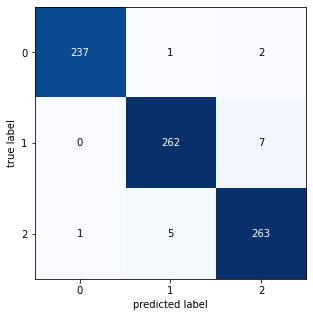

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9958    0.9875    0.9916       240
         NORMAL     0.9776    0.9740    0.9758       269
Viral Pneumonia     0.9669    0.9777    0.9723       269

       accuracy                         0.9794       778
      macro avg     0.9801    0.9797    0.9799       778
   weighted avg     0.9795    0.9794    0.9795       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


CM = confusion_matrix(y_test_labels,predicted_labels, labels=['COVID', 'NORMAL', 'Viral Pneumonia'])
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_test_labels,predicted_labels, target_names=target_names, digits=4))


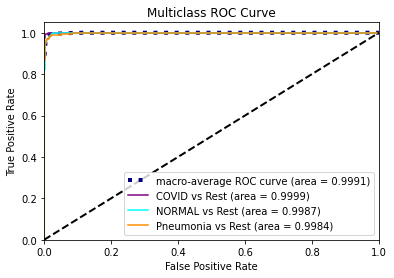

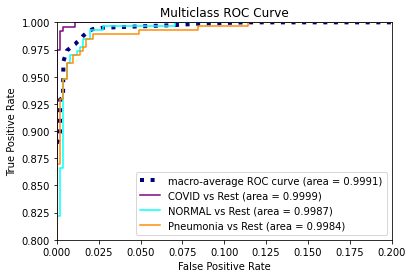

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, y_pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

---
---
# Creating these Models Using ImageDataGenerator for Image Augmentation: 
---
---


In [41]:
PATH = '/content/my-drive/MyDrive/x-ray_project/'

In [42]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [43]:
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')  # directory with our viral pneumonia training x-rays
train_normal_dir = os.path.join(train_dir, 'NORMAL')  # directory with our normal training x-rays
train_covid_dir = os.path.join(train_dir, 'COVID')  # directory with our COVID training x-rays

test_pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')  # directory with our viral pneumonia training x-rays
test_normal_dir = os.path.join(test_dir, 'NORMAL')  # directory with our normal training x-rays
test_covid_dir = os.path.join(test_dir, 'COVID')  # directory with our COVID training x-rays

print(train_covid_dir) # printing example of training COVID directory

/content/my-drive/MyDrive/x-ray_project/train/COVID


In [44]:
num_pneumonia_tr = len(os.listdir(train_pneumonia_dir))
num_normal_tr = len(os.listdir(train_normal_dir))
num_covid_tr = len(os.listdir(train_covid_dir))

num_pneumonia_test = len(os.listdir(test_pneumonia_dir))
num_normal_test = len(os.listdir(test_normal_dir))
num_covid_test = len(os.listdir(test_covid_dir))

total_train = num_pneumonia_tr + num_normal_tr + num_covid_tr
total_test = num_pneumonia_test + num_normal_test + num_covid_test

In [45]:
print('total pneumonia training x-rays:', num_pneumonia_tr)
print('total normal training x-rays:', num_normal_tr)
print('total COVID training x-rays:', num_covid_tr)

print('total pneumonia test x-rays:', num_pneumonia_test)
print('total normal test x-rays:', num_normal_test)
print('total COVID test x-rays:', num_covid_test)
print("--")
print("Total training x-rays:", total_train)
print("Total test x-rays:", total_test)

total pneumonia training x-rays: 1076
total normal training x-rays: 1072
total COVID training x-rays: 960
total pneumonia test x-rays: 269
total normal test x-rays: 269
total COVID test x-rays: 240
--
Total training x-rays: 3108
Total test x-rays: 778


---
# Model 1 - ImageDataGenerator Version
---

In [46]:
batch_size = 60
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project. 
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
#Because I am using validation split with train_image_generator and validation_image_generator, 
#I need to adjust the number of training steps per epoch and number of validation steps per epoch
#to be used within model.fit() further below. Instead of using the arguments 
#steps_per_epoch=total_train // batch_size and validation_steps=total_train // batch_size, I 
#instead use the followin variables for steps_per_epoch and validation_steps, respectively: 

TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

#Source: https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

In [ ]:
#Note, all of the following random seed codes are required in order to allow for reproducable results. 
#See: https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC



with tf.device('/device:GPU:0'):
  opt=Adam(learning_rate=.001)

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(kernel_size=3, filters=8, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  
  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.35) 
  mc = ModelCheckpoint('best_model_1_aug.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  history = model.fit(
    train_gen,
    #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=epochs,
    validation_data=val_gen,
    #validation_steps=total_train // batch_size,
    validation_steps=VAL_STEPS_PER_EPOCH,
    verbose=1,
    callbacks=[mc,red_lr,es]
)

Epoch 1/40
41/41 [==============================] - ETA: 0s - loss: 0.5042 - accuracy: 0.8043 - auc: 0.9338
Epoch 1: val_loss improved from inf to 1.11582, saving model to best_model_1_aug.h5
41/41 [==============================] - 49s 1s/step - loss: 0.5042 - accuracy: 0.8043 - auc: 0.9338 - val_loss: 1.1158 - val_accuracy: 0.3450 - val_auc: 0.5899 - lr: 0.0010
Epoch 2/40
41/41 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9180 - auc: 0.9846
Epoch 2: val_loss did not improve from 1.11582
41/41 [==============================] - 46s 1s/step - loss: 0.2230 - accuracy: 0.9180 - auc: 0.9846 - val_loss: 1.1638 - val_accuracy: 0.4950 - val_auc: 0.6358 - lr: 0.0010
Epoch 3/40
41/41 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9394 - auc: 0.9914
Epoch 3: val_loss did not improve from 1.11582

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.
41/41 [==============================] - 46s 1s/step - loss: 0.1678 

In [ ]:
from tensorflow.keras.models import load_model
#model=load_model("best_model_1_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

13/13 [==============================] - 152s 13s/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


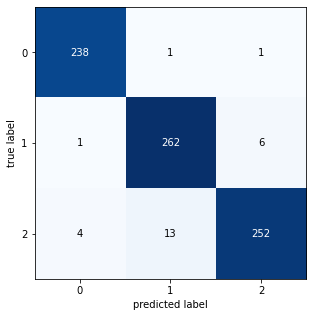

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9794    0.9917    0.9855       240
         NORMAL     0.9493    0.9740    0.9615       269
Viral Pneumonia     0.9730    0.9368    0.9545       269

       accuracy                         0.9666       778
      macro avg     0.9672    0.9675    0.9672       778
   weighted avg     0.9668    0.9666    0.9665       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.966581  0.967174   0.967224  0.967482

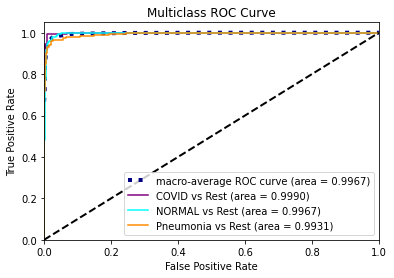

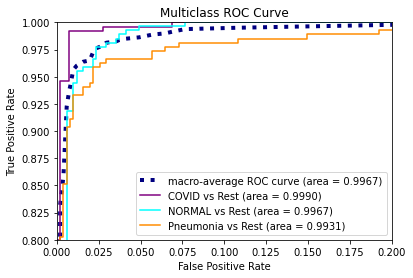

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

---
# Model 2 - ImageDataGenerator Version
---

In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.

train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
 
es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.15)
mc = ModelCheckpoint('best_model_2_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)

model.compile(
  optimizer="adam",
  loss= 'categorical_crossentropy',
  metrics=['accuracy', 'AUC'])
  

history = model.fit(
  train_gen,
  #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
  steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
  epochs=epochs,
  validation_data=val_gen,
  #validation_steps=total_train // batch_size,
  validation_steps=VAL_STEPS_PER_EPOCH,
  verbose=1,
  callbacks=[mc, red_lr, es]
)                    

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.6604 - accuracy: 0.7206 - auc: 0.8864
Epoch 1: val_loss improved from inf to 0.46681, saving model to best_model_2_aug.h5
77/77 [==============================] - 490s 6s/step - loss: 0.6604 - accuracy: 0.7206 - auc: 0.8864 - val_loss: 0.4668 - val_accuracy: 0.7993 - val_auc: 0.9415 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.3878 - accuracy: 0.8511 - auc: 0.9591
Epoch 2: val_loss improved from 0.46681 to 0.31743, saving model to best_model_2_aug.h5
77/77 [==============================] - 47s 614ms/step - loss: 0.3878 - accuracy: 0.8511 - auc: 0.9591 - val_loss: 0.3174 - val_accuracy: 0.8832 - val_auc: 0.9711 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.8933 - auc: 0.9731
Epoch 3: val_loss improved from 0.31743 to 0.23826, saving model to best_model_2_aug.h5
77/77 [==============================] - 47s 612ms/step - loss: 

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_2_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 12s 504ms/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


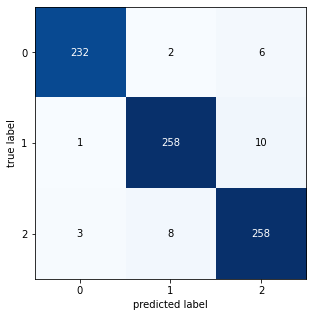

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9831    0.9667    0.9748       240
         NORMAL     0.9627    0.9591    0.9609       269
Viral Pneumonia     0.9416    0.9591    0.9503       269

       accuracy                         0.9614       778
      macro avg     0.9624    0.9616    0.9620       778
   weighted avg     0.9617    0.9614    0.9615       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
   0.96144  0.961987   0.962448  0.961627

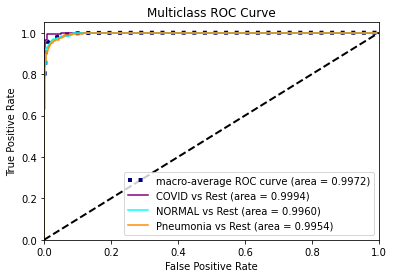

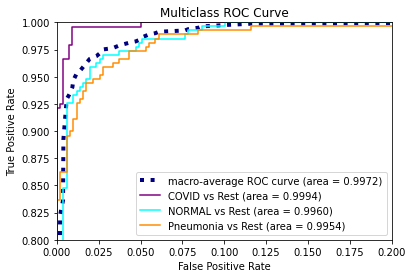

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

---
# Model 3 - ImageDataGenerator Version
---

In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.

train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05)
  mc = ModelCheckpoint('best_model_3_aug.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  history = model.fit(
    train_gen,
    #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=epochs,
    validation_data=val_gen,
    #validation_steps=total_train // batch_size,
    validation_steps=VAL_STEPS_PER_EPOCH,
    verbose=1,
    callbacks=[mc,red_lr,es]
)

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.7141 - auc: 0.8850
Epoch 1: val_loss improved from inf to 0.39228, saving model to best_model_3_aug.h5
77/77 [==============================] - 47s 588ms/step - loss: 0.6708 - accuracy: 0.7141 - auc: 0.8850 - val_loss: 0.3923 - val_accuracy: 0.8520 - val_auc: 0.9568 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8624 - auc: 0.9609
Epoch 2: val_loss improved from 0.39228 to 0.28101, saving model to best_model_3_aug.h5
77/77 [==============================] - 45s 591ms/step - loss: 0.3810 - accuracy: 0.8624 - auc: 0.9609 - val_loss: 0.2810 - val_accuracy: 0.8734 - val_auc: 0.9775 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.3071 - accuracy: 0.8969 - auc: 0.9733
Epoch 3: val_loss improved from 0.28101 to 0.26333, saving model to best_model_3_aug.h5
77/77 [==============================] - 48s 618ms/step - loss

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_3_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 12s 486ms/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


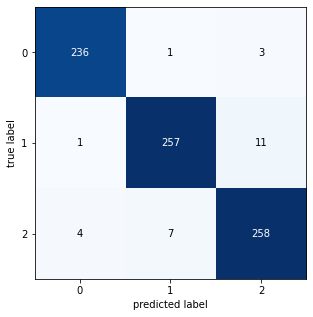

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9793    0.9833    0.9813       240
         NORMAL     0.9698    0.9554    0.9625       269
Viral Pneumonia     0.9485    0.9591    0.9538       269

       accuracy                         0.9653       778
      macro avg     0.9659    0.9659    0.9659       778
   weighted avg     0.9654    0.9653    0.9653       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.965296  0.965875   0.965865  0.965944

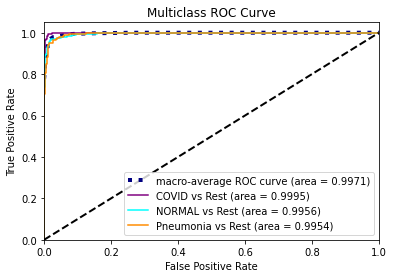

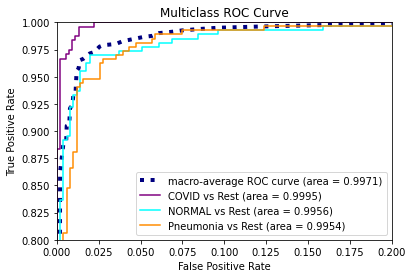

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

---
# Model 4 - ImageDataGenerator Version
---

In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.

train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),    
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),    
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05)
  mc = ModelCheckpoint('best_model_4_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
    
  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  history = model.fit(
    train_gen,
    #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=epochs,
    validation_data=val_gen,
    #validation_steps=total_train // batch_size,
    validation_steps=VAL_STEPS_PER_EPOCH,
    verbose=1,
    callbacks=[mc, red_lr, es]
)

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.6503 - accuracy: 0.7010 - auc: 0.8854 
Epoch 1: val_loss improved from inf to 0.36830, saving model to best_model_4_aug.h5
77/77 [==============================] - 1619s 21s/step - loss: 0.6503 - accuracy: 0.7010 - auc: 0.8854 - val_loss: 0.3683 - val_accuracy: 0.8635 - val_auc: 0.9615 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.8945 - auc: 0.9738
Epoch 2: val_loss improved from 0.36830 to 0.28093, saving model to best_model_4_aug.h5
77/77 [==============================] - 48s 624ms/step - loss: 0.3027 - accuracy: 0.8945 - auc: 0.9738 - val_loss: 0.2809 - val_accuracy: 0.9128 - val_auc: 0.9823 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.2642 - accuracy: 0.9039 - auc: 0.9795
Epoch 3: val_loss improved from 0.28093 to 0.25216, saving model to best_model_4_aug.h5
77/77 [==============================] - 46s 593ms/step - los

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_4_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 582s 24s/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


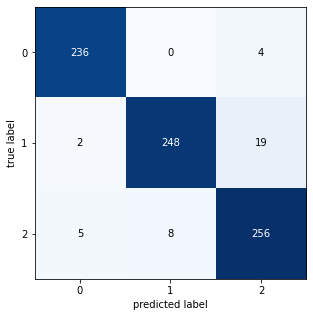

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9712    0.9833    0.9772       240
         NORMAL     0.9688    0.9219    0.9448       269
Viral Pneumonia     0.9176    0.9517    0.9343       269

       accuracy                         0.9512       778
      macro avg     0.9525    0.9523    0.9521       778
   weighted avg     0.9518    0.9512    0.9512       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.951157  0.952098   0.952502  0.952313

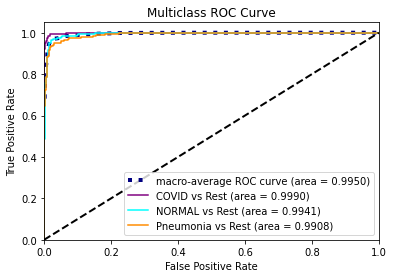

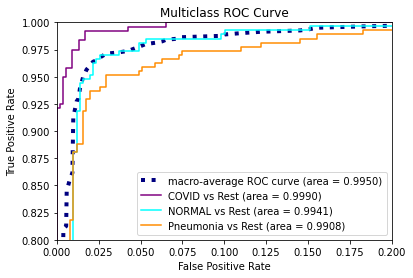

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Model 5 - ImageDataGenerator Version

### **Version of SqueezeNet** 

In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.

train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

# Let's build a squeezenet model instead to see how well it performs 
# Does adding more layers help (i.e.- try building a deeper and deeper network)
l = tf.keras.layers # syntax shortcut

# Create function to define fire modules
def fire(x, squeeze, expand):
  y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y3 = l.Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  return tf.keras.layers.concatenate([y1, y3])

# this is to make it behave similarly to other Keras layers
def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)


with tf.device('/device:GPU:0'):

            x = tf.keras.layers.Input(shape=[192,192, 3]) # input is 192x192 pixels RGB

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = fire_module(8, 16)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(16, 32)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(26, 32)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(32, 64)(y)
            y = tf.keras.layers.BatchNormalization()(y)                         
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(32, 64)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(64, 128)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(64, 128)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = fire_module(128, 256)(y)
            y = tf.keras.layers.BatchNormalization()(y)                        
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(128, 256)(y)
            y = tf.keras.layers.BatchNormalization()(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(y)
            y = tf.keras.layers.BatchNormalization()(y)                       
            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(3, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model = tf.keras.Model(x, y)


red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.05)
mc = ModelCheckpoint('best_model_5_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')

model.compile(
  optimizer="adam",
  loss= 'categorical_crossentropy',
  metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
history = model.fit(
  train_gen,
  #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
  steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
  epochs=epochs,
  validation_data=val_gen,
  #validation_steps=total_train // batch_size,
  validation_steps=VAL_STEPS_PER_EPOCH,
  verbose=1,
  callbacks=[mc,red_lr,es]
)

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.5137 - accuracy: 0.8077 - auc: 0.9305
Epoch 1: val_loss improved from inf to 3.61278, saving model to best_model_5_aug.h5
77/77 [==============================] - 51s 608ms/step - loss: 0.5137 - accuracy: 0.8077 - auc: 0.9305 - val_loss: 3.6128 - val_accuracy: 0.3059 - val_auc: 0.4798 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.3203 - accuracy: 0.8831 - auc: 0.9711
Epoch 2: val_loss did not improve from 3.61278
77/77 [==============================] - 44s 575ms/step - loss: 0.3203 - accuracy: 0.8831 - auc: 0.9711 - val_loss: 5.3654 - val_accuracy: 0.3487 - val_auc: 0.5391 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8912 - auc: 0.9759
Epoch 3: val_loss did not improve from 3.61278

Epoch 00003: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
77/77 [==============================] - 45s 582ms/step - loss

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_5_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 12s 477ms/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


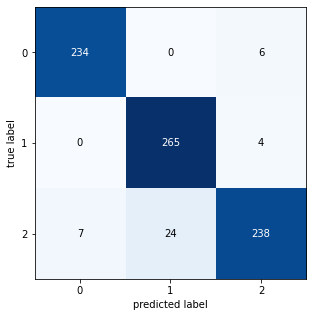

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9710    0.9750    0.9730       240
         NORMAL     0.9170    0.9851    0.9498       269
Viral Pneumonia     0.9597    0.8848    0.9207       269

       accuracy                         0.9473       778
      macro avg     0.9492    0.9483    0.9478       778
   weighted avg     0.9484    0.9473    0.9469       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.947301   0.94783   0.949196  0.948296

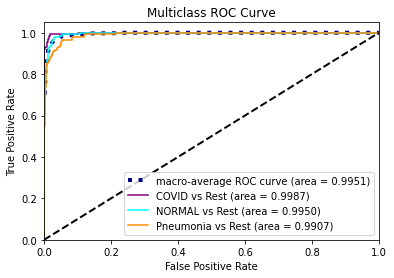

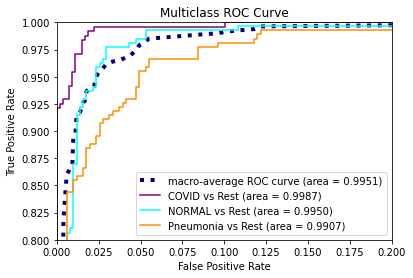

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Model 6 - ImageDataGenerator Version

In [ ]:
batch_size = 50
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

l = tf.keras.layers # syntax shortcut

# Create function to define fire modules
def fire(x, squeeze, expand):
  y = l.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = l.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y2 = l.Conv2D(filters=expand//2, kernel_size=16, padding='same', activation='relu')(y)
  y3 = l.Conv2D(filters=expand//2, kernel_size=16, padding='same', activation='relu')(y)
  y4 = l.Conv2D(filters=expand//2, kernel_size=32, padding='same', activation='relu')(y)
  y5 = l.Conv2D(filters=expand//2, kernel_size=32, padding='same', activation='relu')(y)

  return tf.keras.layers.concatenate([y1, y2, y3, y3, y4, y5])

# this is to make it behave similarly to other Keras layers
def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)

with tf.device('/device:GPU:0'):
            x = tf.keras.layers.Input(shape=[192,192, 3]) # input is 192x192 pixels RGB

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)                        
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
            y = fire_module(24, 48)(y)
            y = fire_module(24, 48)(y)                                                                       
            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(3, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model = tf.keras.Model(x, y)

            es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
            red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.20)
            mc = ModelCheckpoint('best_model_6_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)
            
            model.compile(
            optimizer="adam",
            loss= 'categorical_crossentropy',
            metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
            history = model.fit(
              train_gen,
              #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
              steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
              epochs=epochs,
              validation_data=val_gen,
              #validation_steps=total_train // batch_size,
              validation_steps=VAL_STEPS_PER_EPOCH,
              verbose=1,
              callbacks=[mc,red_lr,es]
            )

Epoch 1/40
49/49 [==============================] - ETA: 0s - loss: 31.3701 - accuracy: 0.3340 - auc: 0.5074 
Epoch 1: val_loss improved from inf to 1.09850, saving model to best_model_6_aug.h5
49/49 [==============================] - 1738s 33s/step - loss: 31.3701 - accuracy: 0.3340 - auc: 0.5074 - val_loss: 1.0985 - val_accuracy: 0.3450 - val_auc: 0.4988 - lr: 0.0010
Epoch 2/40
49/49 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.3402 - auc: 0.5140
Epoch 2: val_loss improved from 1.09850 to 1.09815, saving model to best_model_6_aug.h5
49/49 [==============================] - 75s 2s/step - loss: 1.0983 - accuracy: 0.3402 - auc: 0.5140 - val_loss: 1.0982 - val_accuracy: 0.3433 - val_auc: 0.5158 - lr: 0.0010
Epoch 3/40
49/49 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.3488 - auc: 0.5210
Epoch 3: val_loss improved from 1.09815 to 1.09736, saving model to best_model_6_aug.h5
49/49 [==============================] - 75s 2s/step - loss: 1

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_6_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

16/16 [==============================] - 571s 38s/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


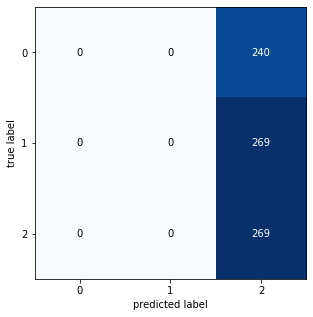

Classification Report
                 precision    recall  f1-score   support

          COVID     0.0000    0.0000    0.0000       240
         NORMAL     0.0000    0.0000    0.0000       269
Viral Pneumonia     0.3458    1.0000    0.5138       269

       accuracy                         0.3458       778
      macro avg     0.1153    0.3333    0.1713       778
   weighted avg     0.1195    0.3458    0.1777       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.345758  0.171283   0.115253  0.333333

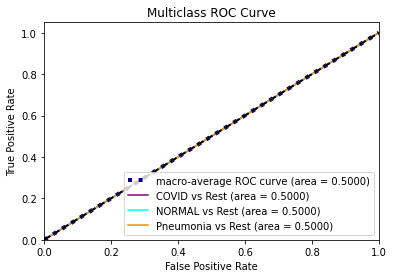

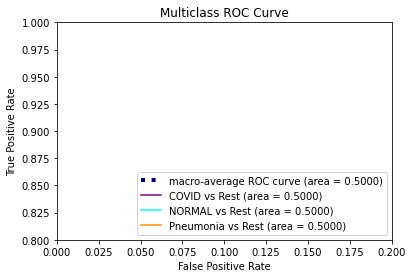

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Model 7 - ImageDataGenerator Version

### **InceptionV3 Transfer Learning Model**

---




In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

# load model new input layer shape.

IMG_SHAPE = (192, 192, 3)

# Create the base model from the pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.summary() # Notice unfrozen number of trainable parameters

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_37 (Conv2D)             (None, 95, 95, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d_37[0][0]']              
 alization)                                                                                       
                      

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune everything up to this layer onwards
freeze_layers_after=30

# Freeze all the layers after the `freeze_layers_after` layer
for layer in base_model.layers[freeze_layers_after:]:
  layer.trainable =  False

print("Number of layers frozen in the base model: ", len(base_model.layers)-freeze_layers_after)

Number of layers in the base model:  311
Number of layers frozen in the base model:  281


In [ ]:
len(base_model.trainable_variables) #trainable layers after freezing

18

In [ ]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
gap1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
class1 = Dense(128, activation='relu')(gap1)
class1 = Dense(128, activation='relu')(class1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_37 (Conv2D)             (None, 95, 95, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d_37[0][0]']              
 alization)                                                                                       
                                                                                            

In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  es= EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr= ReduceLROnPlateau(monitor='val_loss',patience=4,verbose=1,factor=0.05)
  mc = ModelCheckpoint('best_model_7_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  history = model.fit(
    train_gen,
    #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=epochs,
    validation_data=val_gen,
    #validation_steps=total_train // batch_size,
    validation_steps=VAL_STEPS_PER_EPOCH,
    verbose=1,
    callbacks=[mc,red_lr,es]
)

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.4148 - accuracy: 0.8395 - auc: 0.9550
Epoch 1: val_loss improved from inf to 0.45588, saving model to best_model_7_aug.h5
77/77 [==============================] - 58s 654ms/step - loss: 0.4148 - accuracy: 0.8395 - auc: 0.9550 - val_loss: 0.4559 - val_accuracy: 0.8174 - val_auc: 0.9432 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9330 - auc: 0.9873
Epoch 2: val_loss did not improve from 0.45588
77/77 [==============================] - 46s 600ms/step - loss: 0.1964 - accuracy: 0.9330 - auc: 0.9873 - val_loss: 1.0391 - val_accuracy: 0.5115 - val_auc: 0.7988 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.1696 - accuracy: 0.9466 - auc: 0.9902
Epoch 3: val_loss improved from 0.45588 to 0.19603, saving model to best_model_7_aug.h5
77/77 [==============================] - 50s 655ms/step - loss: 0.1696 - accuracy: 0.9466 - auc: 0.9902

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_7_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 14s 509ms/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


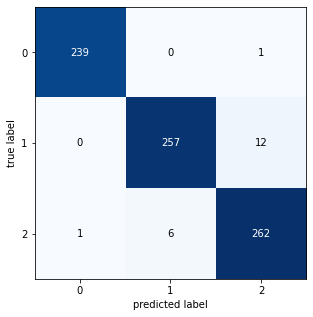

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9958    0.9958    0.9958       240
         NORMAL     0.9772    0.9554    0.9662       269
Viral Pneumonia     0.9527    0.9740    0.9632       269

       accuracy                         0.9743       778
      macro avg     0.9752    0.9751    0.9751       778
   weighted avg     0.9745    0.9743    0.9743       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.974293  0.975078   0.975249  0.975067

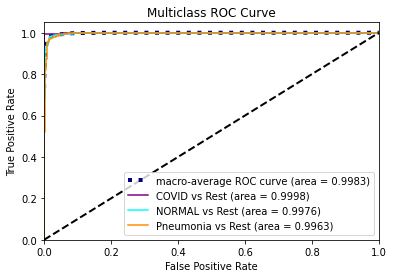

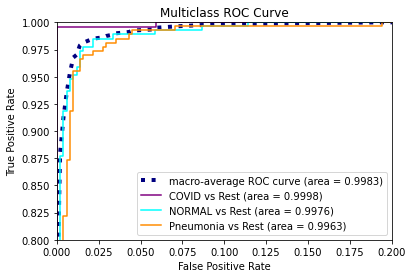

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Model 8 - ImageDataGenerator Version

### **Revised Version of the Above InceptionV3 Transfer Learning Model:**

---


In [ ]:
batch_size = 32
epochs = 40
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Below, I have only included as augmentations random variation in the brightness range and random horizontal flips. I have commented out other possible 
#example augmentations that I chose not to use for this portfolio project.
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our training data

#The validation image generator should not be used to augment data. It is sometimes the case that individuals will use the same 
#ImageDataGenerator object to create both their training image generator and validation image generator. However, that should not 
#be done because the validation set should not be used to augment data, since it is meant to replicate unseen data for the purpose 
#of identifying good tuning parameters. I therefore make sure that my validation_image_generator contains no augmentation parameters.
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,                   
                    validation_split=0.2
                    ) # Generator for our validation data

#The purpose of the test_image_generator is to replicate how the train_image_generator should perform on unseen data (from the test set). 
#I thus use the same parameters for test_image_generator as I did with train_image_generator (with the exception that I do not use 
#validation_split)
test_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=[0.7,1.3],
                    #rotation_range=5,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #shear_range=0.1,
                    fill_mode='nearest',
                    #zoom_range=0.05
                    ) # Generator for our test data                   

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Note: Both train_gen and val_gen use the training set, but since I used validation split, this splits
#the training set into a smaller training set and a validation set. Therefore, train_gen and val_gen
#do not use the same image data but rather different images within the original training set that has 
#been randomly separated.

#Choose subset = 'training'
#Set seed=42 for both train_gen and for val_gen to ensure they are randomized similarly
train_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='train',
                                                     subset='training',
                                                     seed=42, 
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
#Choose subset = 'validation'
val_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory='train',
                                                        subset='validation',
                                                        seed=42,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='categorical')

test_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                    directory='test',
                                                    seed=42,
                                                    shuffle=False, #generally, shuffle should be set to false when the image generator is used on test data
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical')

Found 2487 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 778 images belonging to 3 classes.


In [ ]:
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
gap1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
class1 = Dense(256, activation='relu')(gap1)
class1 = Dense(256, activation='relu')(class1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_37 (Conv2D)             (None, 95, 95, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 95, 32)  96          ['conv2d_37[0][0]']              
 alization)                                                                                       
                                                                                            

In [ ]:
TRAIN_STEPS_PER_EPOCH = np.ceil((total_train*0.8/batch_size)-1)
VAL_STEPS_PER_EPOCH = np.ceil((total_train*0.2/batch_size)-1)

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Flatten
from keras.regularizers import l1
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import class_weight
import numpy as np
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.metrics import AUC

with tf.device('/device:GPU:0'):

  es = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
  red_lr = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.20)
  mc = ModelCheckpoint('best_model_8_aug.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)

  model.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy', 'AUC'])
  
  # Fitting the CNN to the Training set
  history = model.fit(
    train_gen,
    #steps_per_epoch=total_train // batch_size, #adjusts training process for new image batches
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    epochs=epochs,
    validation_data=val_gen,
    #validation_steps=total_train // batch_size,
    validation_steps=VAL_STEPS_PER_EPOCH,
    verbose=1,
    callbacks=[mc,red_lr,es]
)

Epoch 1/40
77/77 [==============================] - ETA: 0s - loss: 0.2078 - accuracy: 0.9271 - auc: 0.9884
Epoch 1: val_loss improved from inf to 0.44476, saving model to best_model_8_aug.h5
77/77 [==============================] - 53s 627ms/step - loss: 0.2078 - accuracy: 0.9271 - auc: 0.9884 - val_loss: 0.4448 - val_accuracy: 0.8520 - val_auc: 0.9524 - lr: 0.0010
Epoch 2/40
77/77 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 0.9493 - auc: 0.9933
Epoch 2: val_loss did not improve from 0.44476
77/77 [==============================] - 46s 594ms/step - loss: 0.1424 - accuracy: 0.9493 - auc: 0.9933 - val_loss: 0.4698 - val_accuracy: 0.8553 - val_auc: 0.9600 - lr: 0.0010
Epoch 3/40
77/77 [==============================] - ETA: 0s - loss: 0.0997 - accuracy: 0.9625 - auc: 0.9962
Epoch 3: val_loss did not improve from 0.44476

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
77/77 [==============================] - 46s 593ms/step - loss

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("best_model_8_aug.h5")

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Using test_generator for predictions on test data:
#Sources: https://stackoverflow.com/questions/52270177/how-to-use-predict-generator-on-new-images-keras
#         https://tylerburleigh.com/blog/predicting-pneumonia-from-chest-x-rays-using-efficientnet/

test_gen.reset() #It's important to always reset the test generator.
Y_pred_test=model.predict(test_gen)
y_pred_test=np.argmax(Y_pred_test,axis=1)

25/25 [==============================] - 15s 529ms/step


In [ ]:
labels = (test_gen.class_indices)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


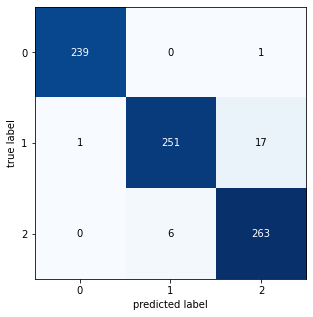

Classification Report
                 precision    recall  f1-score   support

          COVID     0.9958    0.9958    0.9958       240
         NORMAL     0.9767    0.9331    0.9544       269
Viral Pneumonia     0.9359    0.9777    0.9564       269

       accuracy                         0.9679       778
      macro avg     0.9695    0.9689    0.9689       778
   weighted avg     0.9685    0.9679    0.9679       778



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
from numpy.random import seed
seed(seed_value)
import tensorflow
tensorflow.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

y_true_test = test_gen.classes

CM = confusion_matrix(y_true_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['COVID', 'NORMAL', 'Viral Pneumonia']
print(classification_report(y_true_test, y_pred_test, target_names=target_names, digits=4))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'Accuracy': [accuracy_eval], 'F1 Score': [f1_score_eval], 'Precision': [precision_eval], 'Recall': [recall_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])

     else:
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'MSE': [mse_eval], 'RMSE': [rmse_eval], 'MAE': [mae_eval], 'R2': [r2_eval]}
        finalmetricdata = pd.DataFrame(metricdata, index=[''])
     return finalmetricdata

In [ ]:
# get metrics
model_eval_metrics(y_true_test, y_pred_test, classification="TRUE")

Accuracy  F1 Score  Precision    Recall
  0.967866  0.968857   0.969477  0.968871

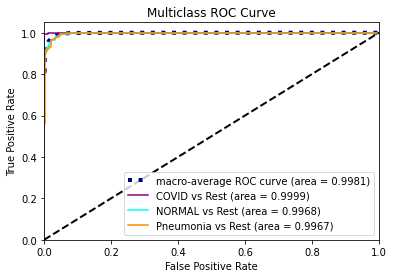

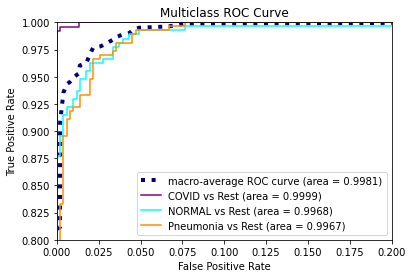

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes=3 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_test, Y_pred_test[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))

plt.figure(1)
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot(fpr[0], tpr[0], color='purple', label='COVID vs Rest (area = {1:0.4f})'.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='aqua', label='NORMAL vs Rest (area = {1:0.4f})'.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='darkorange', label='Pneumonia vs Rest (area = {1:0.4f})'.format(2, roc_auc[2]))
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()